# **Task 2:**
## **Author:** Aniruddha Jana
## **Task description:**
Create the Decision Tree classifier and visualize it graphically.
The purpose is if we feed any new data to this classifier, it would be able to  predict the right class accordingly.

## Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

## Reading Iris dataset

In [2]:
data = pd.read_csv('Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Randomising the dataset

In [4]:
data = data.sample(frac=1).reset_index(drop=True)
data = data.drop(columns='Id')

## Data Description

In [5]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,5.7,2.8,4.1,1.3,Iris-versicolor
2,7.4,2.8,6.1,1.9,Iris-virginica
3,5.5,2.4,3.7,1.0,Iris-versicolor
4,6.5,2.8,4.6,1.5,Iris-versicolor


In [6]:
data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.3,2.5,4.9,1.5,Iris-versicolor
146,6.7,3.1,4.7,1.5,Iris-versicolor
147,4.7,3.2,1.3,0.2,Iris-setosa
148,5.2,2.7,3.9,1.4,Iris-versicolor
149,4.9,2.5,4.5,1.7,Iris-virginica


In [7]:
data.nunique() #unique values

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [8]:
data.shape #shape of the dataset

(150, 5)

In [9]:
data.isnull().sum() # checking for null values

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
print(data.groupby(["Species"]).size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Exploratory Data Analysis

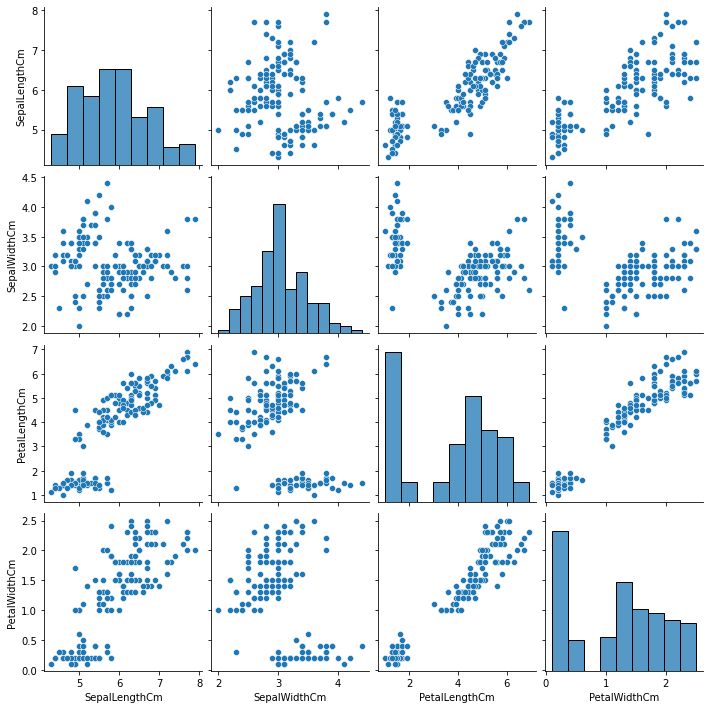

In [13]:
sns.pairplot(data)

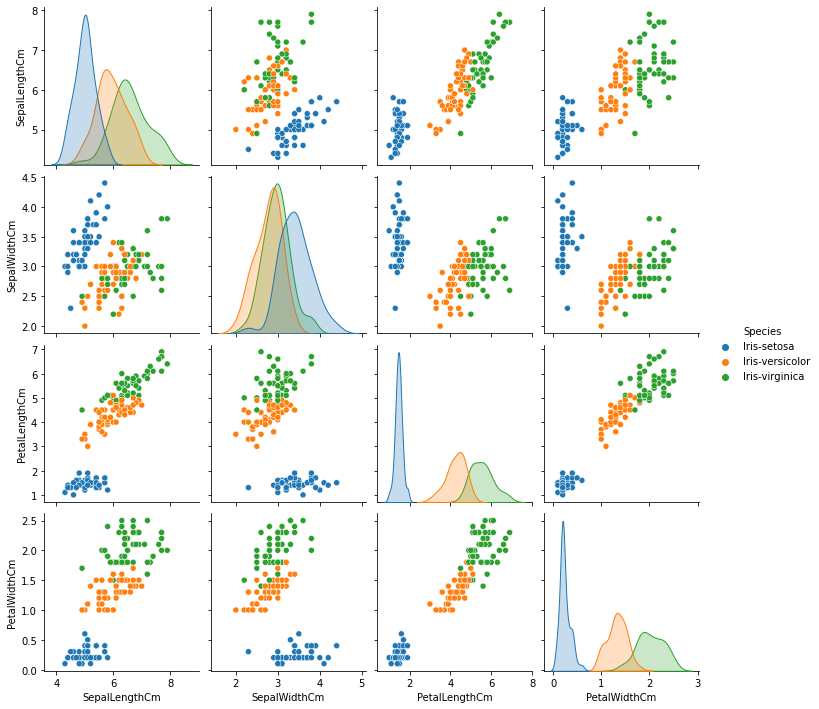

In [14]:
sns.pairplot(data, hue='Species')

## Correlation Matrix

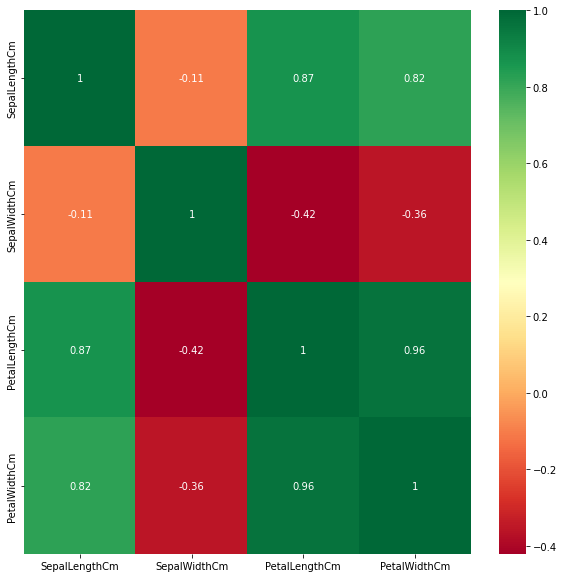

In [15]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heatmap
sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="RdYlGn")

## Boxplots of features

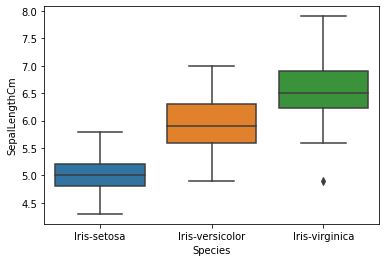

In [16]:
sns.boxplot(x='Species', y='SepalLengthCm',data=data)

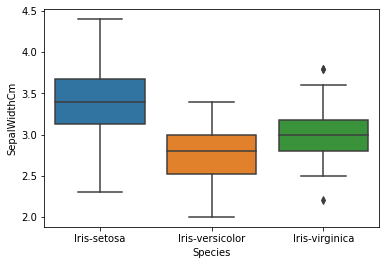

In [17]:
sns.boxplot(x='Species', y='SepalWidthCm',data=data)

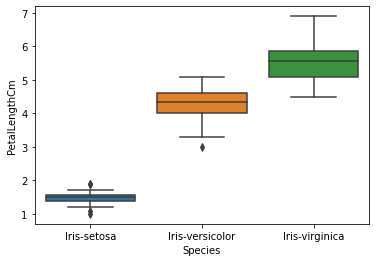

In [18]:
sns.boxplot(x='Species', y='PetalLengthCm',data=data)

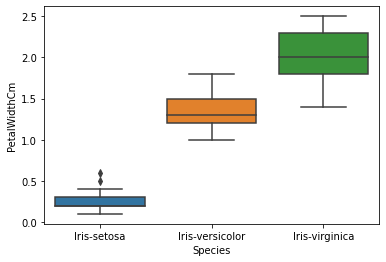

In [19]:
sns.boxplot(x='Species', y='PetalWidthCm',data=data)

## Data splitting

In [20]:
X = data.iloc[:,0:4]
y = data['Species']

In [21]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,5.7,2.8,4.1,1.3
2,7.4,2.8,6.1,1.9
3,5.5,2.4,3.7,1.0
4,6.5,2.8,4.6,1.5


In [22]:
y.head()

0        Iris-setosa
1    Iris-versicolor
2     Iris-virginica
3    Iris-versicolor
4    Iris-versicolor
Name: Species, dtype: object

In [23]:
feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

## Training model

In [24]:
train_features, test_features, train_targets, test_targets = train_test_split(X, y, test_size=0.2, random_state=123)
decision_tree = tree.DecisionTreeClassifier(random_state=777)
decision_tree = decision_tree.fit(train_features, train_targets)

# Visualizing the decision tree

[Text(474.30000000000007, 597.96, 'PetalWidthCm <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [41, 39, 40]\nclass = Iris-setosa'),
 Text(401.33076923076925, 489.24, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]\nclass = Iris-setosa'),
 Text(547.2692307692308, 489.24, 'PetalWidthCm <= 1.75\ngini = 0.5\nsamples = 79\nvalue = [0, 39, 40]\nclass = Iris-virginica'),
 Text(291.8769230769231, 380.52000000000004, 'PetalLengthCm <= 4.95\ngini = 0.206\nsamples = 43\nvalue = [0, 38, 5]\nclass = Iris-versicolor'),
 Text(145.93846153846155, 271.8, 'PetalWidthCm <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = Iris-versicolor'),
 Text(72.96923076923078, 163.07999999999998, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = Iris-versicolor'),
 Text(218.90769230769234, 163.07999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-virginica'),
 Text(437.8153846153847, 271.8, 'PetalWidthCm <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = Iris-virginica'),

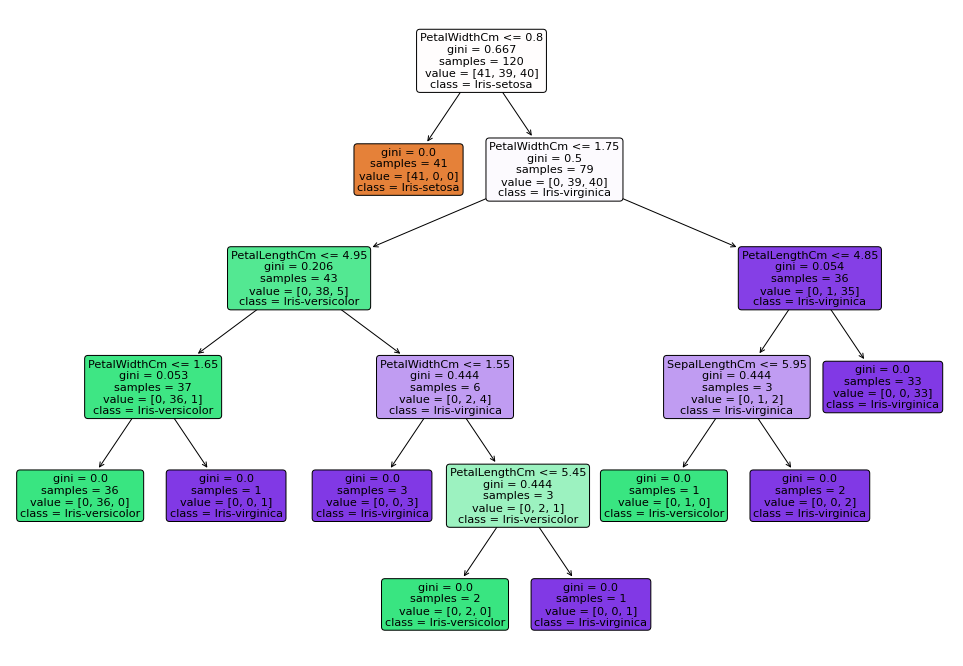

In [25]:
   
plt.subplots(figsize=(17, 12))
tree.plot_tree(decision_tree, feature_names=feature_names, filled=True, rounded=True, class_names=class_names)

## Feature importance

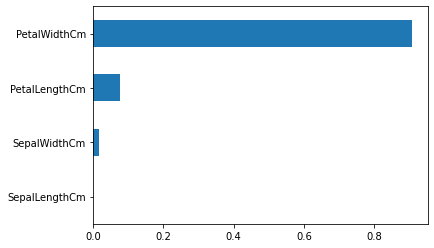

In [26]:
feat_importances = pd.Series(sorted(decision_tree.feature_importances_), index= X.columns)
feat_importances.plot(kind='barh')
plt.show()

## Performance Evaluation
#### Training and test mean accuracy

In [27]:
train_error = np.round(decision_tree.score(train_features, train_targets), 2)
test_error = np.round(decision_tree.score(test_features, test_targets), 2)
    
print("Training Set Mean Accuracy = " + str(train_error))
print("Test Set Mean Accuracy = " + str(test_error))

Training Set Mean Accuracy = 1.0
Test Set Mean Accuracy = 1.0


### Confusion matrix

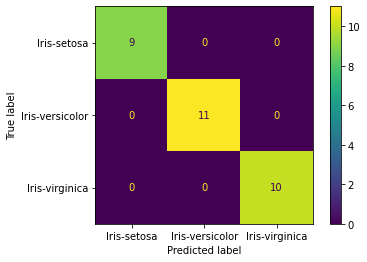

In [28]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(decision_tree, test_features, test_targets)  
plt.show()

#Testing

In [29]:
SepalLength = float(input("Enter Sepal Length in cm: "))
SepalWidth = float(input("Enter Sepal Width in cm: "))
PetalLength = float(input("Enter Petal Length in cm: "))
PetalWidth = float(input("Enter Petal Width in cm: "))
features = [SepalLength, SepalWidth, PetalLength, PetalWidth]

Enter Sepal Length in cm: 5.9
Enter Sepal Width in cm: 7.7
Enter Petal Length in cm: 3.5
Enter Petal Width in cm: 2.4


In [36]:
features = np.array(features)

In [41]:
features = features.reshape(-1, 1).T
features.shape

(1, 4)

In [44]:
pred = decision_tree.predict(features)
print("Predicted type of flower:",pred[0])

Predicted type of flower: Iris-versicolor
